In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [114]:
df = pd.read_csv('/content/insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [115]:
df.duplicated().sum()

0

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [117]:
df['_c39'].value_counts()

,count
_c39,


In [118]:
df.drop(columns = '_c39', inplace=True)

In [119]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [120]:
df['authorities_contacted'].value_counts()

,count
authorities_contacted,
Police,292
Fire,223
Other,198
Ambulance,196


In [121]:
df['authorities_contacted'] = df['authorities_contacted'].fillna('Other')

In [122]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [123]:
df.sample(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
125,206,39,965768,2014-07-27,IN,250/500,1000,1302.40,6000000,603948,MALE,JD,craft-repair,dancing,unmarried,47200,-69700,2015-02-17,Multi-vehicle Collision,Rear Collision,Total Loss,Ambulance,NY,Hillsdale,1598 3rd Drive,12,3,NO,2,3,YES,36300,3300,9900,23100,Ford,Escape,2013,N
400,369,53,936638,1995-05-20,OH,250/500,2000,1459.93,0,438584,FEMALE,Masters,priv-house-serv,video-games,not-in-family,0,0,2015-02-09,Multi-vehicle Collision,Front Collision,Total Loss,Police,WV,Springfield,1123 5th Lane,10,2,YES,1,3,NO,77990,7090,14180,56720,Jeep,Wrangler,2012,N
771,209,39,362407,1996-12-06,IN,100/300,500,1264.99,0,614169,MALE,PhD,transport-moving,polo,husband,67800,0,2015-01-01,Single Vehicle Collision,Side Collision,Minor Damage,Fire,VA,Northbrook,3340 3rd Hwy,22,1,?,1,1,NO,37800,8400,4200,25200,Chevrolet,Silverado,1995,N
788,119,34,594783,2011-12-30,IL,250/500,500,1299.18,0,463271,FEMALE,College,tech-support,hiking,wife,57100,0,2015-01-08,Single Vehicle Collision,Front Collision,Major Damage,Fire,OH,Springfield,7393 Washington St,7,1,YES,2,1,YES,45540,8280,8280,28980,Honda,Civic,1998,Y
599,239,38,485642,1990-08-25,OH,250/500,1000,1276.73,5000000,610246,FEMALE,Masters,handlers-cleaners,bungie-jumping,other-relative,0,0,2015-02-19,Multi-vehicle Collision,Front Collision,Major Damage,Police,WV,Northbrook,4175 Elm Ridge,12,3,NO,1,3,?,61920,6880,6880,48160,Saab,93,2003,N
804,267,46,362843,2004-08-09,OH,250/500,2000,1111.17,0,469438,MALE,MD,craft-repair,base-jumping,unmarried,35000,0,2015-02-03,Parked Car,?,Trivial Damage,Other,WV,Arlington,4905 Best Lane,3,1,YES,2,3,YES,4950,900,450,3600,Toyota,Camry,1995,N
825,293,49,569245,1995-12-05,IL,100/300,2000,1239.06,0,439360,FEMALE,JD,transport-moving,skydiving,husband,34900,0,2015-01-10,Single Vehicle Collision,Front Collision,Total Loss,Police,SC,Riverwood,2820 Britain St,19,1,?,1,1,?,57310,5210,10420,41680,Volkswagen,Passat,2002,N
296,231,43,655787,2006-06-17,IL,250/500,2000,972.47,0,441981,MALE,College,protective-serv,reading,wife,0,-58100,2015-02-01,Multi-vehicle Collision,Front Collision,Minor Damage,Police,PA,Hillsdale,6522 Apache Drive,15,3,YES,2,2,YES,77100,7710,15420,53970,Audi,A3,2010,N
747,37,31,230223,2008-09-06,IL,500/1000,500,1969.63,0,615218,FEMALE,MD,sales,skydiving,own-child,0,0,2015-02-13,Multi-vehicle Collision,Side Collision,Total Loss,Fire,WV,Northbend,1618 Maple Hwy,21,3,NO,1,1,YES,76450,6950,13900,55600,Dodge,RAM,1995,N
144,106,31,165485,1998-02-12,IL,500/1000,2000,1320.75,0,441491,FEMALE,JD,farming-fishing,video-games,wife,54100,0,2015-02-01,Multi-vehicle Collision,Rear Collision,Total Loss,Police,WV,Springfield,6315 2nd Lane,20,3,?,0,3,YES,45630,5070,5070,35490,Accura,MDX,2011,N


In [124]:
variables_with_missing_values = df.columns[df.isin(['?']).any()].tolist()
variables_with_missing_values

['collision_type', 'property_damage', 'police_report_available']

In [125]:
df[variables_with_missing_values].head()

,collision_type,property_damage,police_report_available
0,Side Collision,YES,YES
1,?,?,?
2,Rear Collision,NO,NO
3,Front Collision,?,NO
4,?,NO,NO


In [126]:
df['collision_type'] = df['collision_type'].replace('?', np.nan)
df['property_damage'] = df['property_damage'].replace('?', np.nan)
df['police_report_available'] = df['police_report_available'].replace('?', np.nan)

df[variables_with_missing_values].head()

,collision_type,property_damage,police_report_available
0,Side Collision,YES,YES
1,NaN,NaN,NaN
2,Rear Collision,NO,NO
3,Front Collision,NaN,NO
4,NaN,NO,NO


In [127]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [128]:
df['collision_type'].value_counts()

,count
collision_type,
Rear Collision,292
Side Collision,276
Front Collision,254


In [129]:
df['collision_type'] = df['collision_type'].fillna('Rear Collision')

In [130]:
df['property_damage'].value_counts()

,count
property_damage,
NO,338
YES,302


In [131]:
df['property_damage'] = df['property_damage'].fillna('NO')

In [132]:
df['police_report_available'].value_counts()

,count
police_report_available,
NO,343
YES,314


In [133]:
df['police_report_available'] = df['police_report_available'].fillna('NO')

In [134]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [135]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,Other,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [137]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

In [138]:
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [139]:
num_columns = df.select_dtypes(include=['int', 'float'])
cat_columns = df.select_dtypes(exclude=['int', 'float', 'datetime64[ns]']).drop(columns=['fraud_reported'])

In [140]:
num_columns.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009


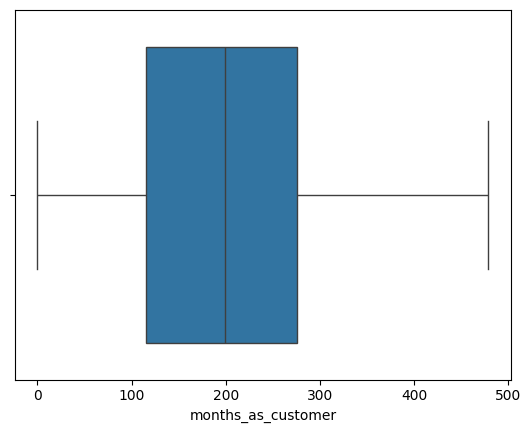

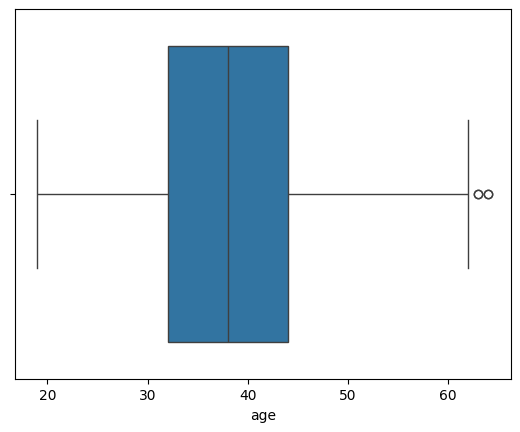

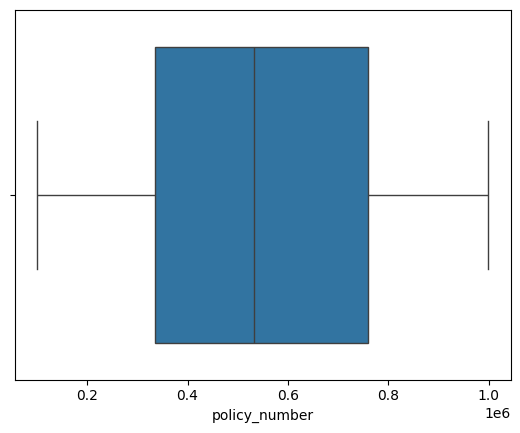

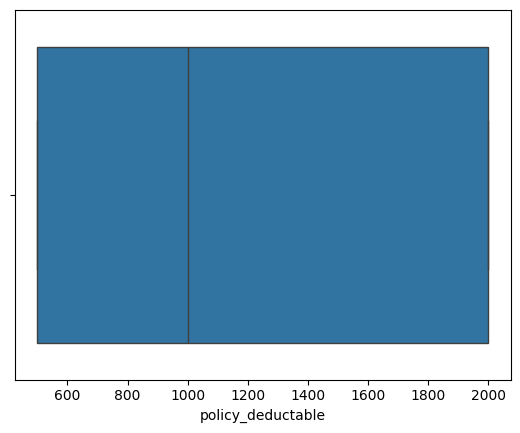

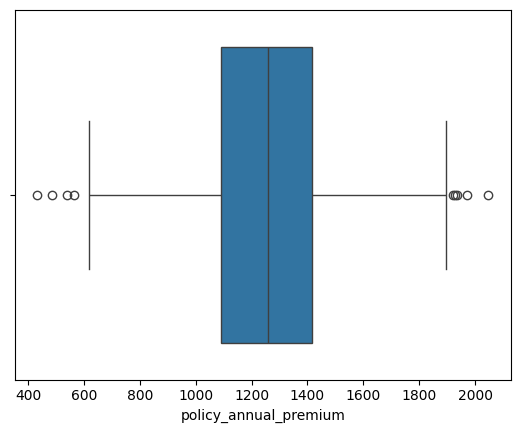

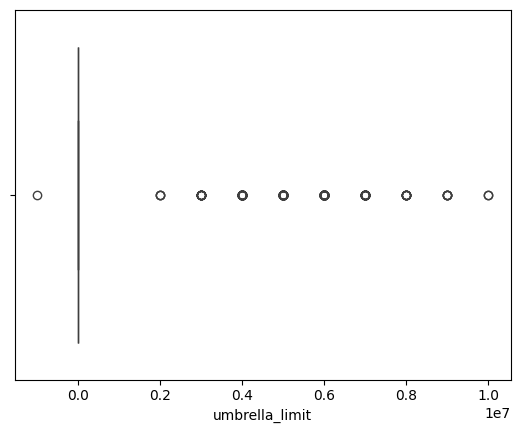

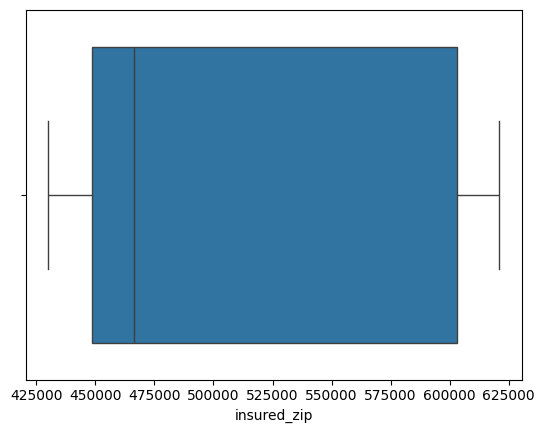

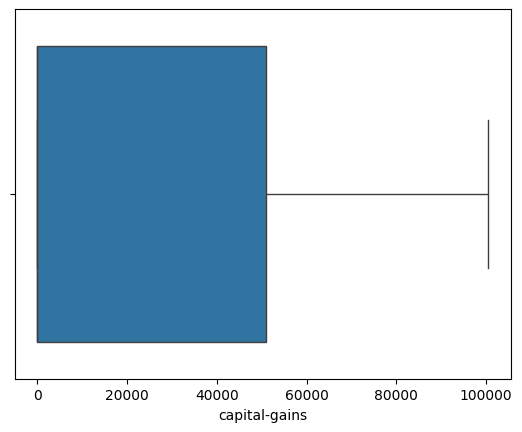

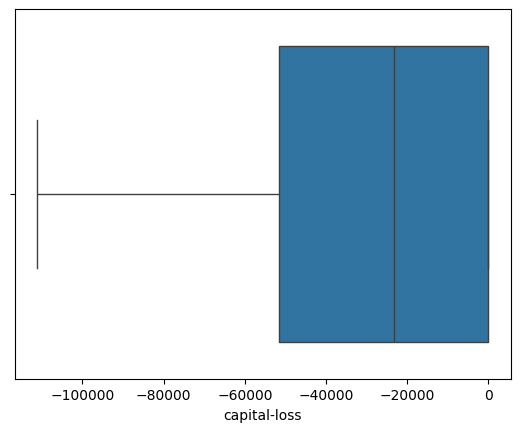

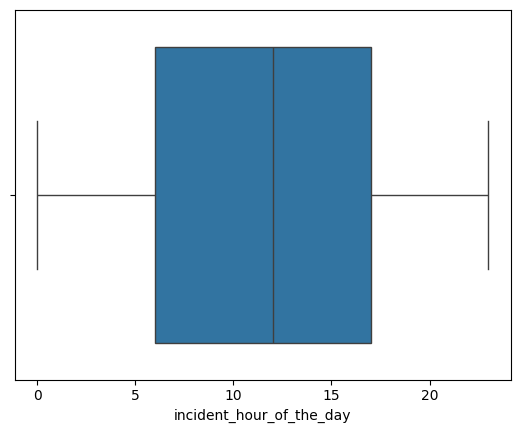

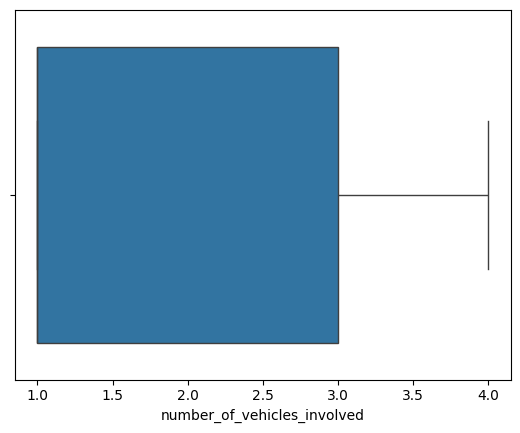

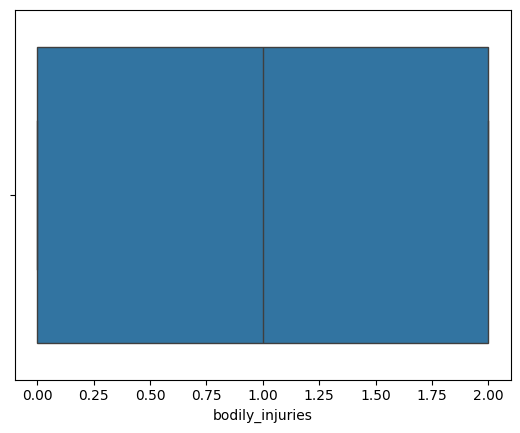

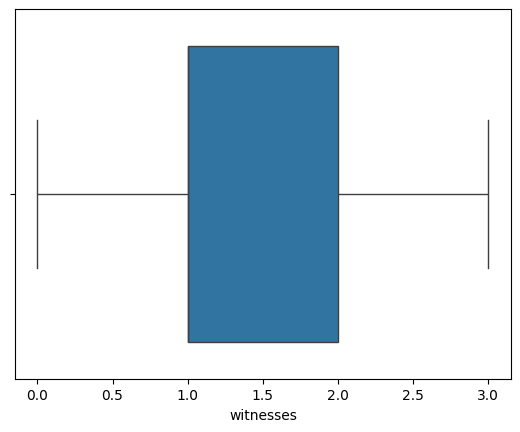

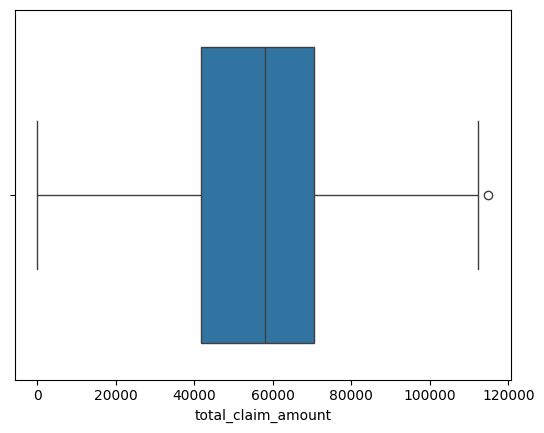

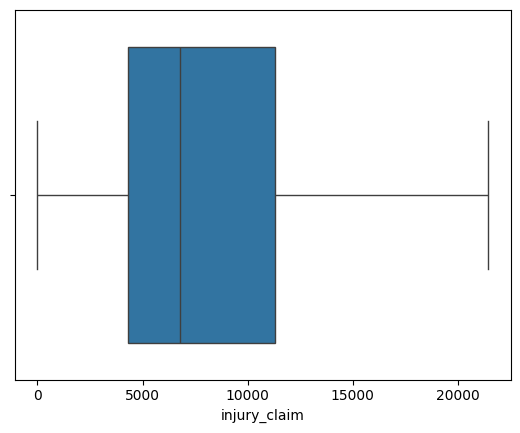

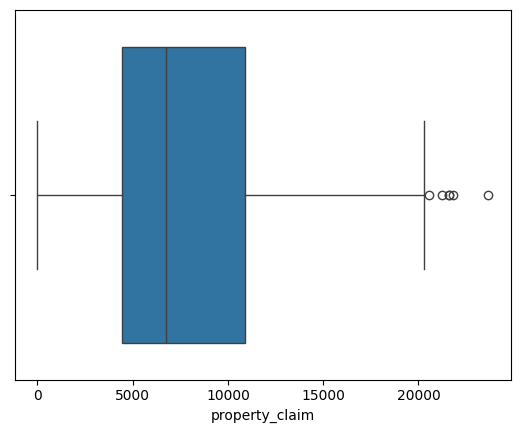

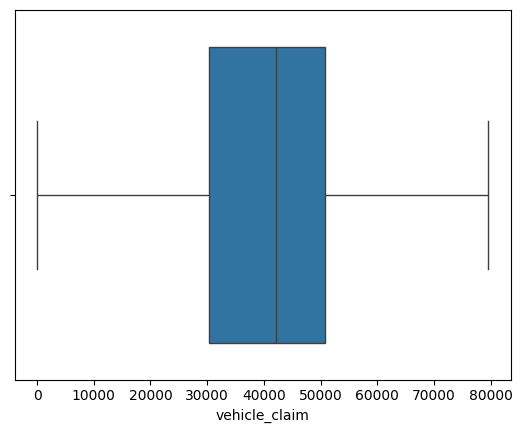

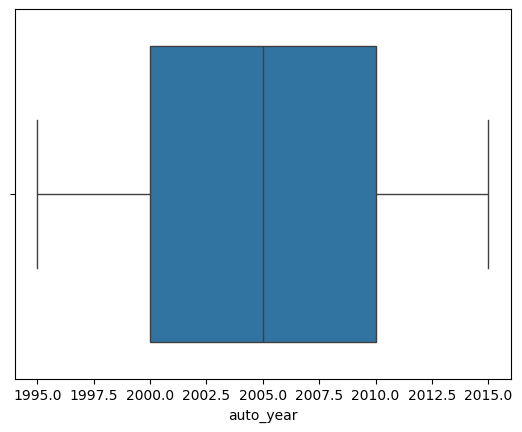

In [141]:
for col in num_columns.columns:
  sns.boxplot(x = col, data = df)
  plt.show()

In [142]:
num_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [143]:
df['umbrella_limit'].value_counts()

,count
umbrella_limit,
0,798
6000000,57
5000000,46
4000000,39
7000000,29
3000000,12
8000000,8
9000000,5
2000000,3


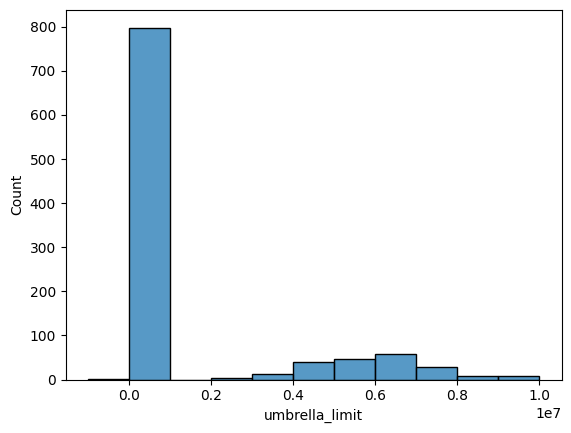

In [144]:
sns.histplot(x = 'umbrella_limit', data = df)
plt.show()

In [145]:
cat_columns.head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NO,NO,Mercedes,E400
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,NO,NO,Chevrolet,Tahoe
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,Other,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX


In [146]:
for col in cat_columns:
  print(f"value counts for {col}")
  print(df[col].value_counts())
  print()
  print()

value counts for policy_state
policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64


value counts for policy_csl
policy_csl
250/500     351
100/300     349
500/1000    300
Name: count, dtype: int64


value counts for insured_sex
insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64


value counts for insured_education_level
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64


value counts for insured_occupation
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64


value counts for insured_hobbies
insured_h

In [147]:
cat_columns.columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model'],
      dtype='object')

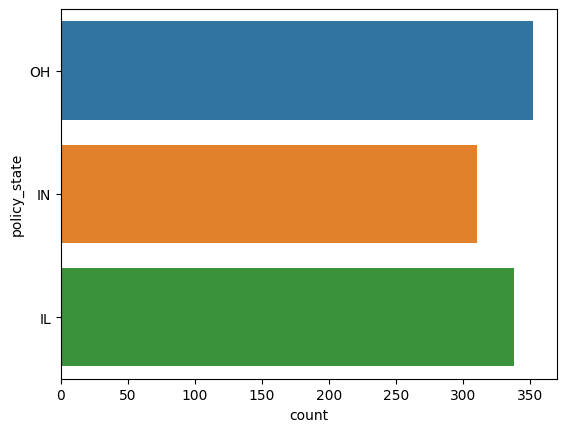

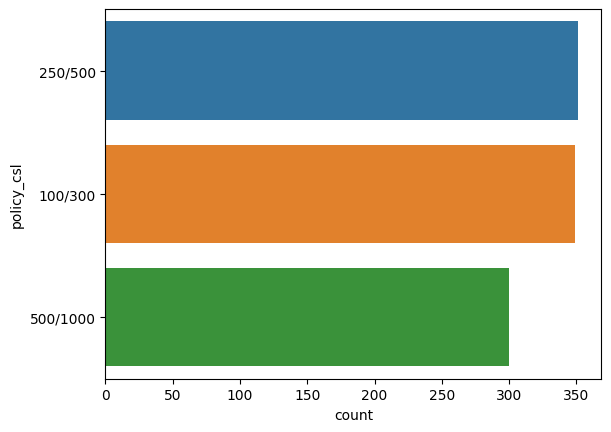

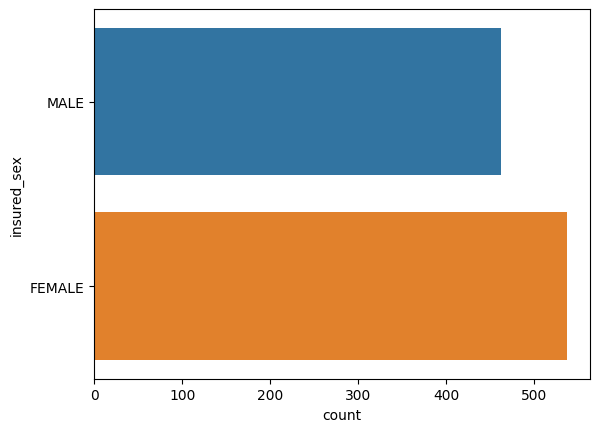

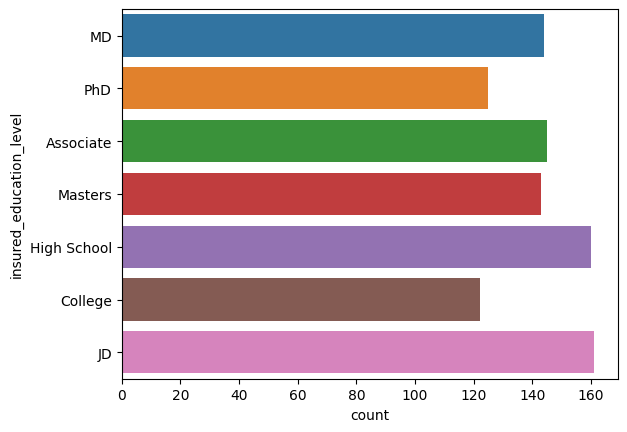

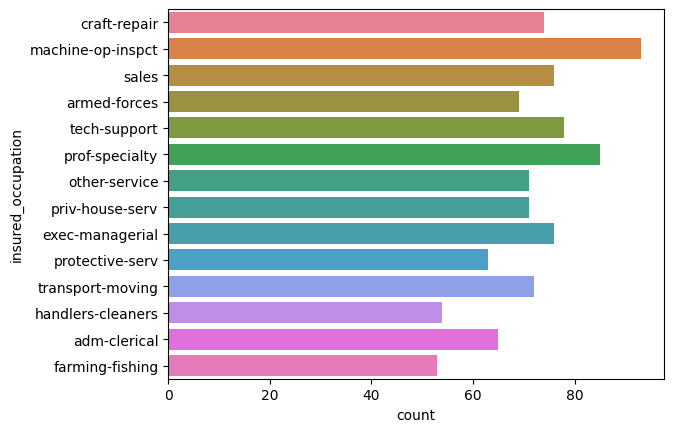

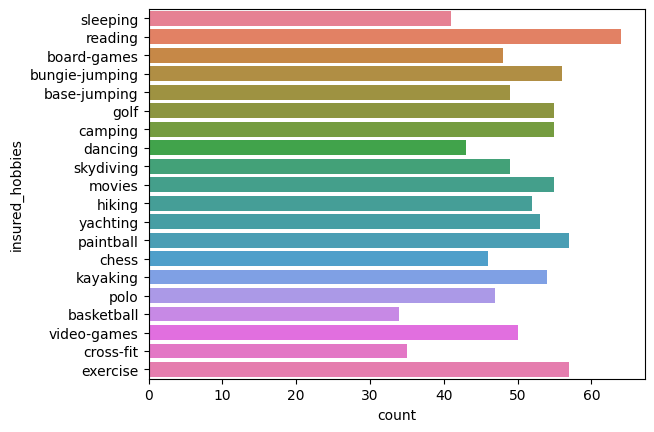

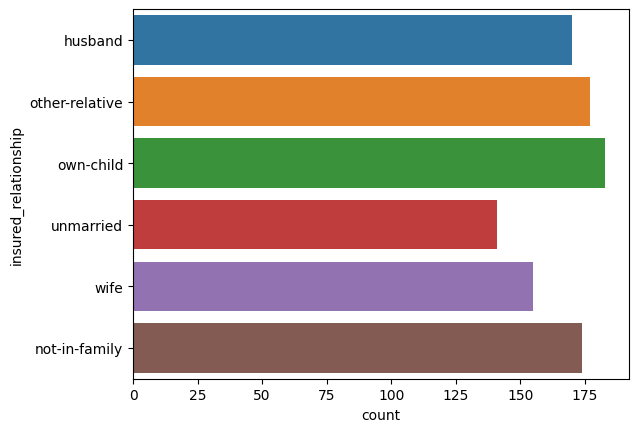

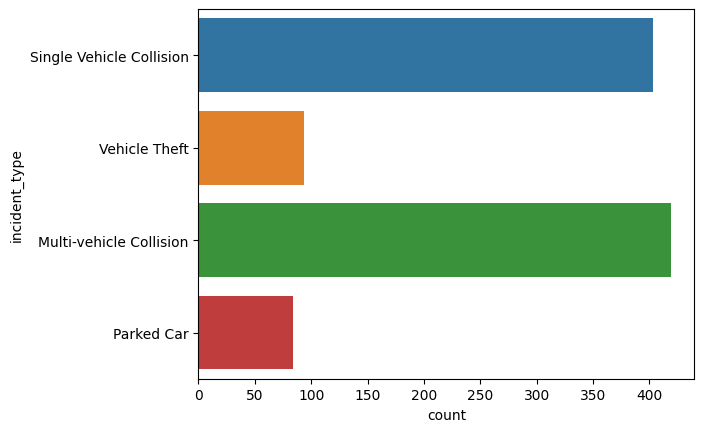

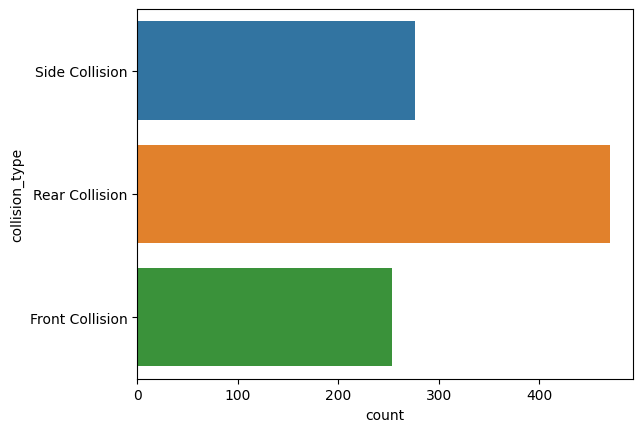

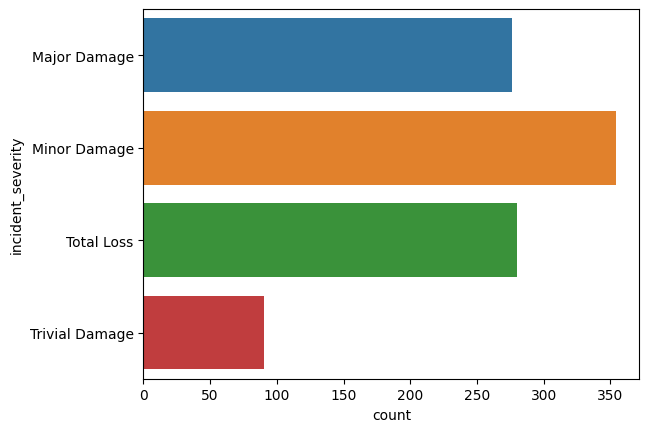

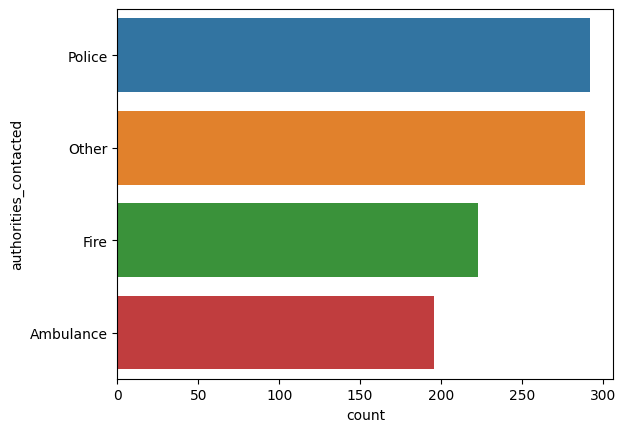

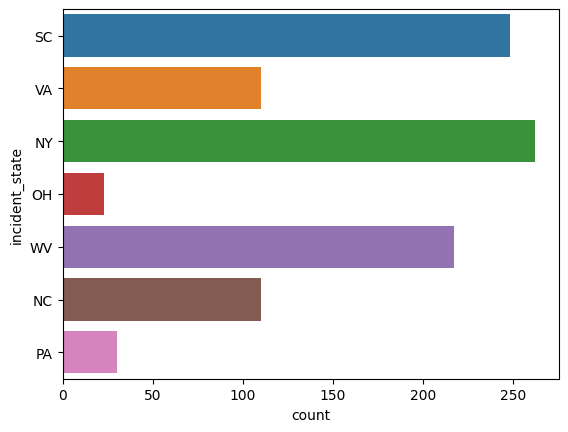

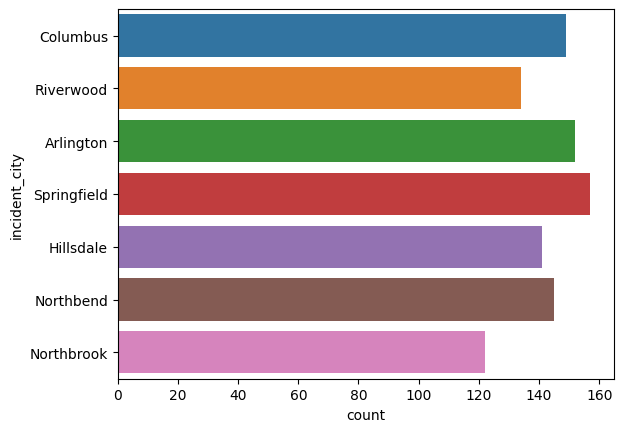

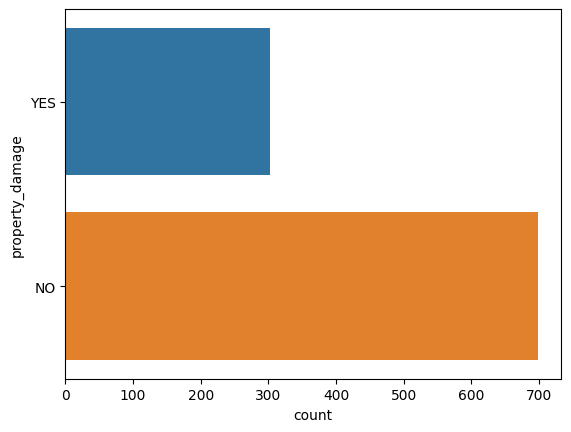

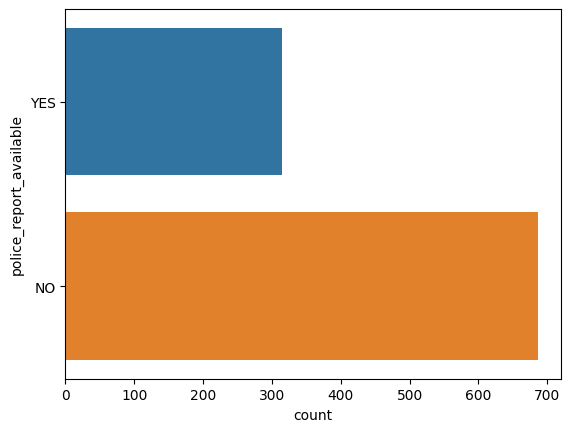

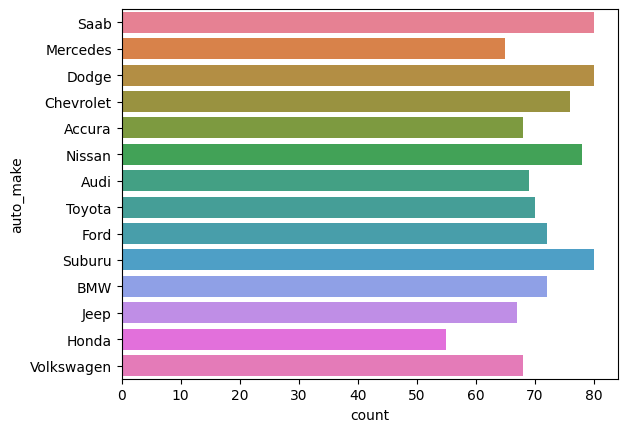

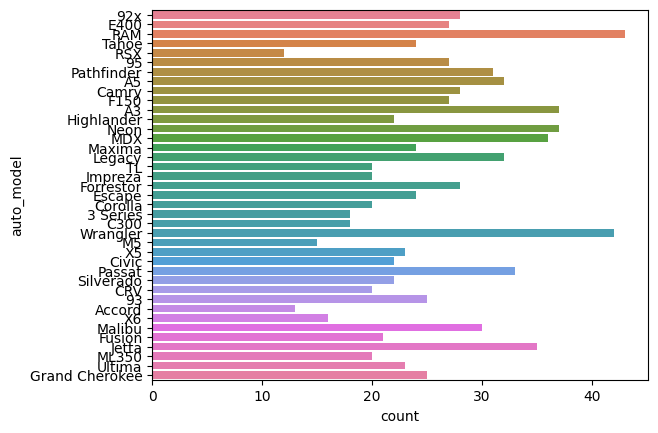

In [148]:
cat_columns = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model']

for col in cat_columns:
  sns.countplot(y = col, data = df, hue = col)
  plt.show()

In [149]:
df['fraud_reported'].value_counts(normalize=True)

,proportion
fraud_reported,
N,0.753
Y,0.247


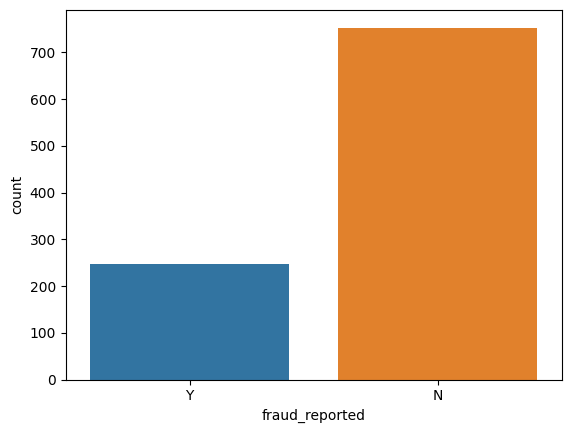

In [150]:
sns.countplot(x = 'fraud_reported', data = df, hue='fraud_reported')
plt.show()

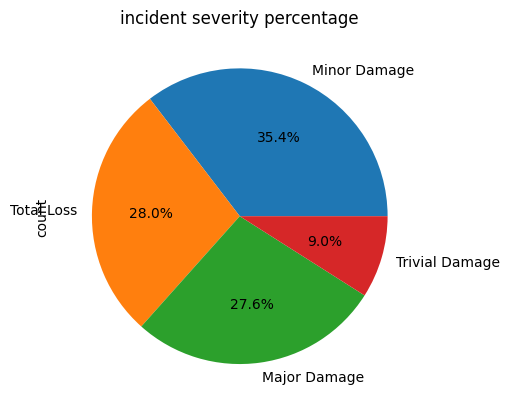

In [151]:
df['incident_severity'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('incident severity percentage')
plt.show()

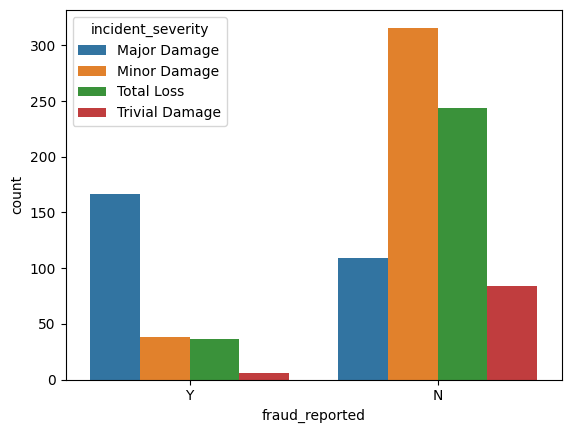

In [152]:
sns.countplot(x = 'fraud_reported', hue='incident_severity', data = df)
plt.show()

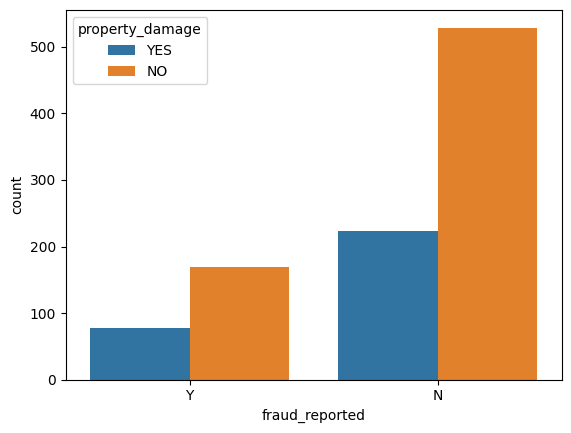

In [153]:
sns.countplot(x = 'fraud_reported', hue = 'property_damage', data = df)
plt.show()

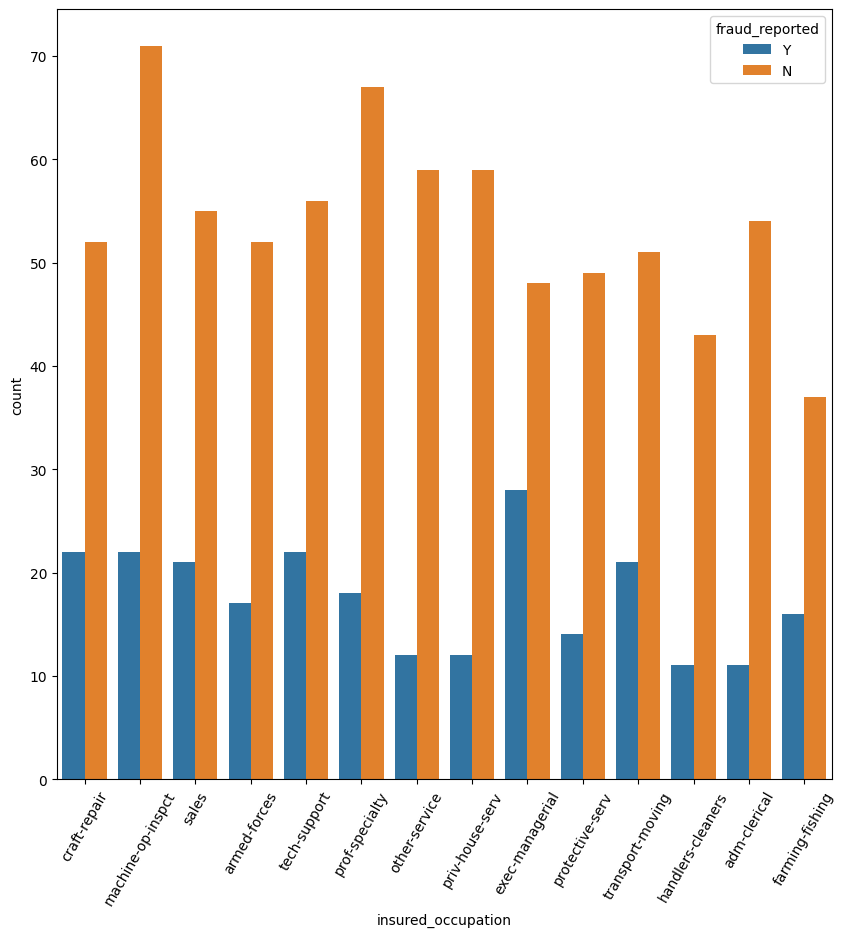

In [154]:
plt.figure(figsize=(10, 10))
sns.countplot(x = 'insured_occupation', hue = 'fraud_reported', data = df)
plt.xticks(rotation=60)
plt.show()

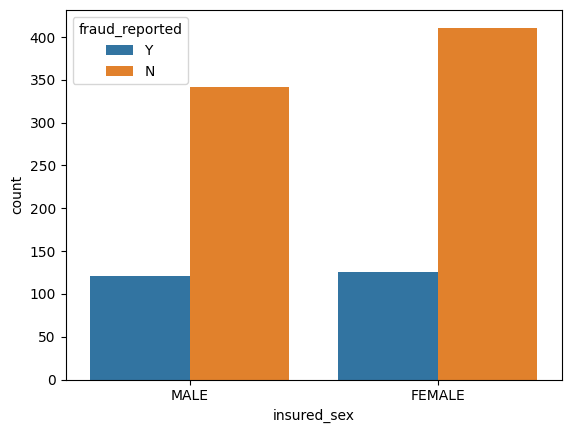

In [155]:
sns.countplot(x = 'insured_sex', hue='fraud_reported', data = df)
plt.show()

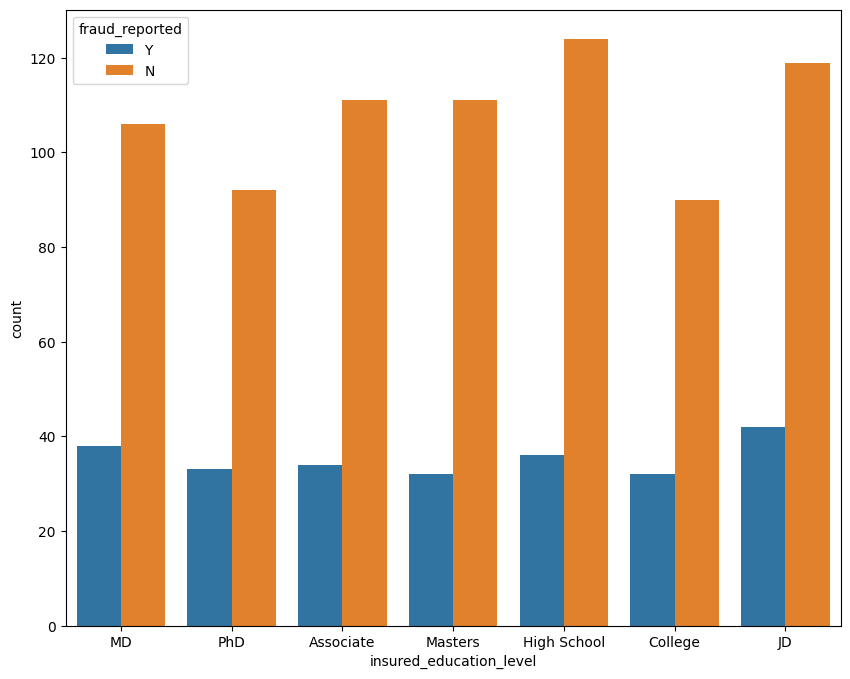

In [156]:
plt.figure(figsize=(10, 8))
sns.countplot(x = 'insured_education_level', hue='fraud_reported', data = df)
plt.show()

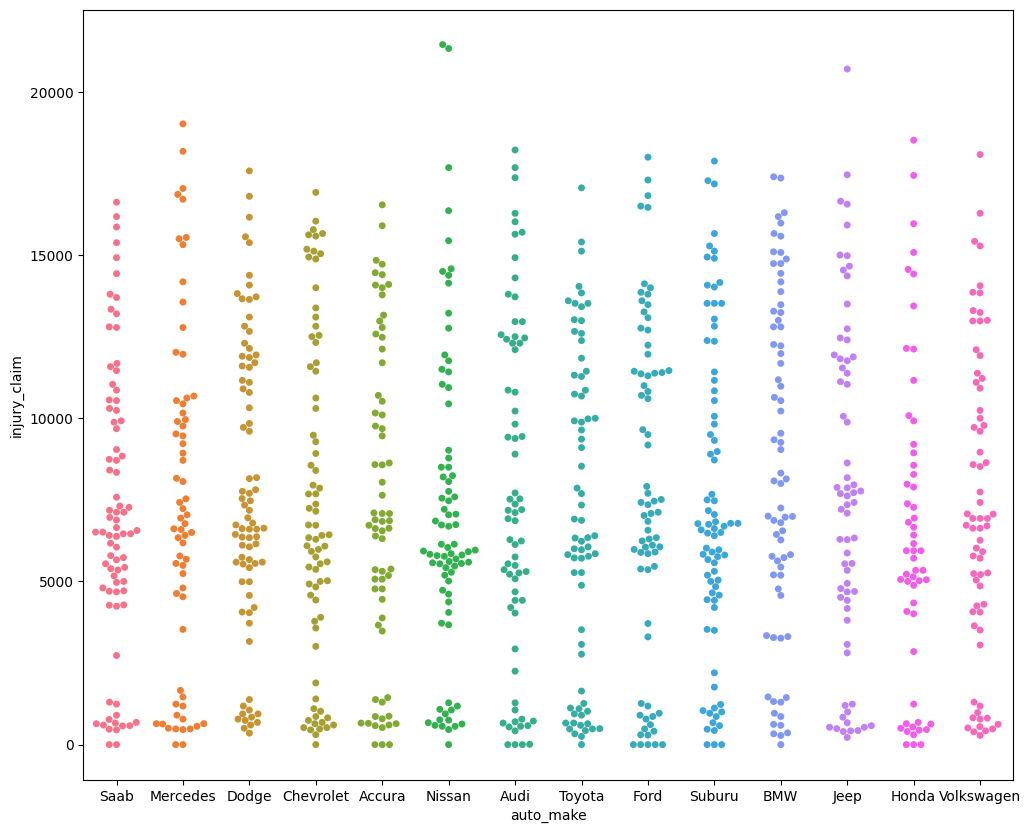

In [157]:
plt.figure(figsize=(12, 10))
sns.swarmplot(x = 'auto_make', y = 'injury_claim', hue = 'auto_make', data = df)
plt.show()

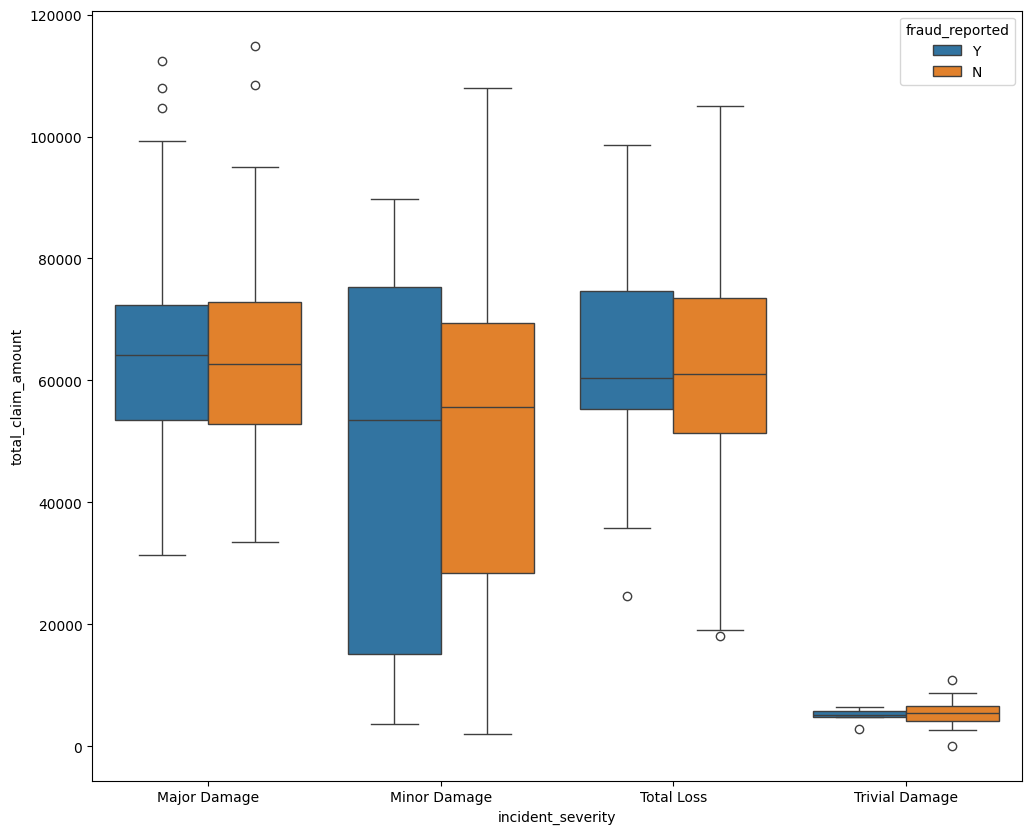

In [158]:
plt.figure(figsize=(12, 10))
sns.boxplot(x = 'incident_severity', y = 'total_claim_amount', hue = 'fraud_reported', data = df)
plt.show()

In [159]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,Other,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [160]:
df['policy_bind_date'].head()

,policy_bind_date
0,2014-10-17
1,2006-06-27
2,2000-09-06
3,1990-05-25
4,2014-06-06


In [161]:
df['policy_bind_year'] = df['policy_bind_date'].dt.year
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_weekday'] = df['policy_bind_date'].dt.weekday
df['policy_bind_quarter'] = df['policy_bind_date'].dt.quarter

In [162]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,policy_bind_weekday,policy_bind_quarter
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2014,10,17,4,4
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,2006,6,27,1,2
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2000,9,6,2,3
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990,5,25,4,2
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,Other,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,2014,6,6,4,2


In [163]:
df.drop(columns='policy_bind_date', inplace=True)

In [164]:
df['incident_date'].head()

,incident_date
0,2015-01-25
1,2015-01-21
2,2015-02-22
3,2015-01-10
4,2015-02-17


In [165]:
df['incident_year'] = df['incident_date'].dt.year
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day
df['incident_weekday'] = df['incident_date'].dt.weekday
df['incident_quarter'] = df['incident_date'].dt.quarter

In [166]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,policy_bind_weekday,policy_bind_quarter,incident_year,incident_month,incident_day,incident_weekday,incident_quarter
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2014,10,17,4,4,2015,1,25,6,1
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,2006,6,27,1,2,2015,1,21,2,1
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2000,9,6,2,3,2015,2,22,6,1
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990,5,25,4,2,2015,1,10,5,1
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,Other,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,2014,6,6,4,2,2015,2,17,1,1


In [167]:
df.drop(columns='incident_date', inplace=True)

In [168]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,policy_bind_weekday,policy_bind_quarter,incident_year,incident_month,incident_day,incident_weekday,incident_quarter
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2014,10,17,4,4,2015,1,25,6,1
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,2006,6,27,1,2,2015,1,21,2,1
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2000,9,6,2,3,2015,2,22,6,1
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990,5,25,4,2,2015,1,10,5,1
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,Other,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,2014,6,6,4,2,2015,2,17,1,1


In [169]:
df['policy_csl'].value_counts()

,count
policy_csl,
250/500,351
100/300,349
500/1000,300


In [170]:
df.drop(columns=['policy_number', 'insured_zip', 'incident_location'], inplace=True)

In [171]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,policy_bind_weekday,policy_bind_quarter,incident_year,incident_month,incident_day,incident_weekday,incident_quarter
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2014,10,17,4,4,2015,1,25,6,1
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,2006,6,27,1,2,2015,1,21,2,1
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2000,9,6,2,3,2015,2,22,6,1
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990,5,25,4,2,2015,1,10,5,1
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,Other,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,2014,6,6,4,2,2015,2,17,1,1


In [172]:
df = pd.get_dummies(df, columns=['insured_sex','insured_occupation', 'insured_relationship', 'incident_type', 'collision_type',
                                 'authorities_contacted', 'property_damage', 'police_report_available', 'auto_make', 'auto_model'], dtype=int)

In [173]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,insured_hobbies,capital-gains,capital-loss,incident_severity,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,policy_bind_weekday,policy_bind_quarter,incident_year,incident_month,incident_day,incident_weekday,incident_quarter,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,OH,250/500,1000,1406.91,0,MD,sleeping,53300,0,Major Damage,SC,Columbus,5,1,1,2,71610,6510,13020,52080,2004,Y,2014,10,17,4,4,2015,1,25,6,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,228,42,IN,250/500,2000,1197.22,5000000,MD,reading,0,0,Minor Damage,VA,Riverwood,8,1,0,0,5070,780,780,3510,2007,Y,2006,6,27,1,2,2015,1,21,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,134,29,OH,100/300,2000,1413.14,5000000,PhD,board-games,35100,0,Minor Damage,NY,Columbus,7,3,2,3,34650,7700,3850,23100,2007,N,2000,9,6,2,3,2015,2,22,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,256,41,IL,250/500,2000,1415.74,6000000,PhD,board-games,48900,-62400,Major Damage,OH,Arlington,5,1,1,2,63400,6340,6340,50720,2014,Y,1990,5,25,4,2,2015,1,10,5,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,228,44,IL,500/1000,1000,1583.91,6000000,Associate,board-games,66000,-46000,Minor Damage,NY,Arli

In [174]:
df['incident_city'].value_counts()

,count
incident_city,
Springfield,157
Arlington,152
Columbus,149
Northbend,145
Hillsdale,141
Riverwood,134
Northbrook,122


In [175]:
df.drop(columns=['insured_hobbies', 'incident_state'], inplace=True)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,capital-gains,capital-loss,incident_severity,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,policy_bind_weekday,policy_bind_quarter,incident_year,incident_month,incident_day,incident_weekday,incident_quarter,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,OH,250/500,1000,1406.91,0,MD,53300,0,Major Damage,Columbus,5,1,1,2,71610,6510,13020,52080,2004,Y,2014,10,17,4,4,2015,1,25,6,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,228,42,IN,250/500,2000,1197.22,5000000,MD,0,0,Minor Damage,Riverwood,8,1,0,0,5070,780,780,3510,2007,Y,2006,6,27,1,2,2015,1,21,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,134,29,OH,100/300,2000,1413.14,5000000,PhD,35100,0,Minor Damage,Columbus,7,3,2,3,34650,7700,3850,23100,2007,N,2000,9,6,2,3,2015,2,22,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,256,41,IL,250/500,2000,1415.74,6000000,PhD,48900,-62400,Major Damage,Arlington,5,1,1,2,63400,6340,6340,50720,2014,Y,1990,5,25,4,2,2015,1,10,5,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,228,44,IL,500/1000,1000,1583.91,6000000,Associate,66000,-46000,Minor Damage,Arlington,20,1,0,1,6500,1300,650,4550,2009,N,2014,6,6,4,2,2015,2,17,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [176]:
df = pd.get_dummies(df, columns=['policy_state', 'incident_city'], dtype=int)
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,policy_bind_weekday,policy_bind_quarter,incident_year,incident_month,incident_day,incident_weekday,incident_quarter,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,policy_state_IL,policy_state_IN,policy_state_OH,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield
0,328,48,250/500,1000,1406.91,0,MD,53300,0,Major Damage,5,1,1,2,71610,6510,13020,52080,2004,Y,2014,10,17,4,4,2015,1,25,6,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,228,42,250/500,2000,1197.22,5000000,MD,0,0,Minor Damage,8,1,0,0,5070,780,780,3510,2007,Y,2006,6,27,1,2,2015,1,21,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,134,29,100/300,2000,1413.14,5000000,PhD,35100,0,Minor Damage,7,3,2,3,34650,7700,3850,23100,2007,N,2000,9,6,2,3,2015,2,22,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,256,41,250/500,2000,1415.74,6000000,PhD,48900,-62400,Major Damage,5,1,1,2,63400,6340,6340,50720,2014,Y,1990,5,25,4,2,2015,1,10,5,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [177]:
df[['policy_csl', 'insured_education_level', 'incident_severity']].head()

,policy_csl,insured_education_level,incident_severity
0,250/500,MD,Major Damage
1,250/500,MD,Minor Damage
2,100/300,PhD,Minor Damage
3,250/500,PhD,Major Damage
4,500/1000,Associate,Minor Damage


In [178]:
df['policy_csl'].value_counts()

,count
policy_csl,
250/500,351
100/300,349
500/1000,300


In [179]:
df = pd.get_dummies(df, columns=['policy_csl'], dtype=int)

In [180]:
df['incident_severity'].value_counts()

,count
incident_severity,
Minor Damage,354
Total Loss,280
Major Damage,276
Trivial Damage,90


In [181]:
df['insured_education_level'].value_counts()

,count
insured_education_level,
JD,161
High School,160
Associate,145
MD,144
Masters,143
PhD,125
College,122


In [182]:
from sklearn.preprocessing import OrdinalEncoder

severity_order = ['Trivial Damage', 'Minor Damage', 'Major Damage', 'Total Loss']
education_order = ['High School', 'College', 'Associate', 'JD', 'MD', 'Masters', 'PhD']

encoder = OrdinalEncoder(categories=[severity_order, education_order])

df[['incident_severity', 'insured_education_level']] = encoder.fit_transform(df[['incident_severity', 'insured_education_level']])

df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,policy_bind_weekday,policy_bind_quarter,incident_year,incident_month,incident_day,incident_weekday,incident_quarter,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,policy_state_IL,policy_state_IN,policy_state_OH,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000
0,328,48,1000,1406.91,0,4.0,53300,0,2.0,5,1,1,2,71610,6510,13020,52080,2004,Y,2014,10,17,4,4,2015,1,25,6,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,228,42,2000,1197.22,5000000,4.0,0,0,1.0,8,1,0,0,5070,780,780,3510,2007,Y,2006,6,27,1,2,2015,1,21,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,134,29,2000,1413.14,5000000,6.0,35100,0,1.0,7,3,2,3,34650,7700,3850,23100,2007,N,2000,9,6,2,3,2015,2,22,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,256,41,2000,1415.74,6000000,6.0,48900,-62400,2.0,5,1,1,2,63400,6340,6340,50720,2014,Y,1990,5,25,4,2,2015,1,10,5,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [183]:
num_columns = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
                'capital-gains', 'capital-loss', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year',
               'policy_bind_year','policy_bind_day','incident_year', 'incident_day']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[num_columns] = scaler.fit_transform(df[num_columns])

df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,policy_bind_weekday,policy_bind_quarter,incident_year,incident_month,incident_day,incident_weekday,incident_quarter,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,policy_state_IL,policy_state_IN,policy_state_OH,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000
0,1.078140,0.990836,-0.222383,0.616705,-0.479476,4.0,1.011331,0.953851,2.0,5,1,1,2,0.714257,-0.189283,1.165505,0.749653,-0.183440,Y,1.684992,10,0.176292,4,4,0.0,1,1.154424,6,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,0.208995,0.334073,1.412784,-0.242521,1.697980,4.0,-0.901927,0.953851,1.0,8,1,0,0,-1.807312,-1.363822,-1.372696,-1.823346,0.315491,Y,0.597550,6,1.312191,1,2,0.0,1,0.692885,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,-0.608002,-1.088913,1.412784,0.642233,1.697980,6.0,0.358023,0.953851,1.0,7,3,2,3,-0.686362,0.054644,-0.736072,-0.785565,0.315491,N,-0.218032,9,-1.073198,2,3,0.0,2,0.808270,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,0.452355,0.224613,1.412784,0.652886,2.133471,6.0,0.853388,-1.267

In [184]:
num_columns

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'policy_bind_year',
 'policy_bind_day',
 'incident_year',
 'incident_day']

In [185]:
import scipy.stats as stats

for col in num_columns:
  fraud = df[df['fraud_reported'] == 'Y'][col]
  non_fraud = df[df['fraud_reported'] == 'N'][col]

  t_statistic, p_value = stats.ttest_ind(fraud, non_fraud)

  if p_value < 0.05:
    print(f"Reject Null Hypothesis: There is a significant association between {col} and fraud_reported")
  else:
    print(f"Fail To Reject Null Hypothesis: There is no significant association between {col} and fraud_reported")

  print()
  print()


Fail To Reject Null Hypothesis: There is no significant association between months_as_customer and fraud_reported


Fail To Reject Null Hypothesis: There is no significant association between age and fraud_reported


Fail To Reject Null Hypothesis: There is no significant association between policy_deductable and fraud_reported


Fail To Reject Null Hypothesis: There is no significant association between policy_annual_premium and fraud_reported


Fail To Reject Null Hypothesis: There is no significant association between umbrella_limit and fraud_reported


Fail To Reject Null Hypothesis: There is no significant association between capital-gains and fraud_reported


Fail To Reject Null Hypothesis: There is no significant association between capital-loss and fraud_reported


Reject Null Hypothesis: There is a significant association between total_claim_amount and fraud_reported


Reject Null Hypothesis: There is a significant association between injury_claim and fraud_reported


Reject N

In [186]:
selected_num_columns = ['policy_bind_day', 'vehicle_claim', 'property_claim', 'injury_claim', 'total_claim_amount']

In [187]:
cat_columns = ['insured_education_level', 'incident_severity', 'insured_sex_FEMALE', 'insured_sex_MALE',
                'insured_occupation_adm-clerical', 'insured_occupation_armed-forces', 'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
               'insured_occupation_farming-fishing', 'insured_occupation_handlers-cleaners', 'insured_occupation_machine-op-inspct',
               'insured_occupation_other-service', 'insured_occupation_priv-house-serv', 'insured_occupation_prof-specialty', 'insured_occupation_protective-serv',
               'insured_occupation_sales', 'insured_occupation_tech-support', 'insured_occupation_transport-moving', 'insured_relationship_husband',
               'insured_relationship_not-in-family', 'insured_relationship_other-relative', 'insured_relationship_own-child', 'insured_relationship_unmarried',
               'insured_relationship_wife', 'incident_type_Multi-vehicle Collision', 'incident_type_Parked Car', 'incident_type_Single Vehicle Collision',
               'incident_type_Vehicle Theft','collision_type_Front Collision',
 'collision_type_Rear Collision','collision_type_Side Collision','authorities_contacted_Ambulance','authorities_contacted_Fire','authorities_contacted_Other',
 'authorities_contacted_Police','property_damage_NO','property_damage_YES','police_report_available_NO','police_report_available_YES','auto_make_Accura',
 'auto_make_Audi','auto_make_BMW','auto_make_Chevrolet','auto_make_Dodge','auto_make_Ford','auto_make_Honda','auto_make_Jeep','auto_make_Mercedes',
 'auto_make_Nissan','auto_make_Saab','auto_make_Suburu','auto_make_Toyota','auto_make_Volkswagen','auto_model_3 Series','auto_model_92x','auto_model_93',
 'auto_model_95','auto_model_A3','auto_model_A5','auto_model_Accord','auto_model_C300','auto_model_CRV','auto_model_Camry','auto_model_Civic','auto_model_Corolla',
 'auto_model_E400','auto_model_Escape','auto_model_F150','auto_model_Forrestor','auto_model_Fusion','auto_model_Grand Cherokee','auto_model_Highlander','auto_model_Impreza',
 'auto_model_Jetta','auto_model_Legacy','auto_model_M5','auto_model_MDX','auto_model_ML350','auto_model_Malibu','auto_model_Maxima','auto_model_Neon','auto_model_Passat','auto_model_Pathfinder',
 'auto_model_RAM','auto_model_RSX','auto_model_Silverado','auto_model_TL','auto_model_Tahoe','auto_model_Ultima','auto_model_Wrangler','auto_model_X5','auto_model_X6',
 'policy_state_IL','policy_state_IN','policy_state_OH','incident_city_Arlington','incident_city_Columbus','incident_city_Hillsdale','incident_city_Northbend','incident_city_Northbrook',
 'incident_city_Riverwood','incident_city_Springfield','policy_csl_100/300','policy_csl_250/500','policy_csl_500/1000']

In [188]:
from scipy.stats import chi2_contingency

for col in cat_columns:
  observed = pd.crosstab(df[col], df['fraud_reported'])

  chi2, p_value, dof, expected = chi2_contingency(observed)

  if p_value < 0.05:
    print(f"Reject Null Hypothesis: There is a significant association between the {col} and fraud_reported.")
  else:
    print(f"Fail To Reject Null Hypothesis: There is no significant association between {col} and fraud_reported")
  print()
  print()

Fail To Reject Null Hypothesis: There is no significant association between insured_education_level and fraud_reported


Reject Null Hypothesis: There is a significant association between the incident_severity and fraud_reported.


Fail To Reject Null Hypothesis: There is no significant association between insured_sex_FEMALE and fraud_reported


Fail To Reject Null Hypothesis: There is no significant association between insured_sex_MALE and fraud_reported


Fail To Reject Null Hypothesis: There is no significant association between insured_occupation_adm-clerical and fraud_reported


Fail To Reject Null Hypothesis: There is no significant association between insured_occupation_armed-forces and fraud_reported


Fail To Reject Null Hypothesis: There is no significant association between insured_occupation_craft-repair and fraud_reported


Reject Null Hypothesis: There is a significant association between the insured_occupation_exec-managerial and fraud_reported.


Fail To Reject Null Hyp

In [189]:
selected_cat_columns = ['incident_severity', 'insured_occupation_exec-managerial', 'incident_type_Parked Car',
'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft']

In [190]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,policy_bind_weekday,policy_bind_quarter,incident_year,incident_month,incident_day,incident_weekday,incident_quarter,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,policy_state_IL,policy_state_IN,policy_state_OH,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000
0,1.078140,0.990836,-0.222383,0.616705,-0.479476,4.0,1.011331,0.953851,2.0,5,1,1,2,0.714257,-0.189283,1.165505,0.749653,-0.183440,Y,1.684992,10,0.176292,4,4,0.0,1,1.154424,6,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,0.208995,0.334073,1.412784,-0.242521,1.697980,4.0,-0.901927,0.953851,1.0,8,1,0,0,-1.807312,-1.363822,-1.372696,-1.823346,0.315491,Y,0.597550,6,1.312191,1,2,0.0,1,0.692885,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,-0.608002,-1.088913,1.412784,0.642233,1.697980,6.0,0.358023,0.953851,1.0,7,3,2,3,-0.686362,0.054644,-0.736072,-0.785565,0.315491,N,-0.218032,9,-1.073198,2,3,0.0,2,0.808270,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,0.452355,0.224613,1.412784,0.652886,2.133471,6.0,0.853388,-1.267

In [191]:
cat_columns2 = ['number_of_vehicles_involved', 'bodily_injuries', 'policy_bind_weekday',
 'policy_bind_quarter', 'incident_month', 'incident_weekday']

In [192]:
from scipy.stats import chi2_contingency

for col in cat_columns2:
  observed = pd.crosstab(df[col], df['fraud_reported'])

  chi2, p_value, dof, expected = chi2_contingency(observed)

  if p_value < 0.05:
    print(f"Reject Null Hypothesis: There is a significant association between the {col} and fraud_reported.")
  else:
    print(f"Fail To Reject Null Hypothesis: There is no significant association between {col} and fraud_reported")
  print()
  print()

Fail To Reject Null Hypothesis: There is no significant association between number_of_vehicles_involved and fraud_reported


Fail To Reject Null Hypothesis: There is no significant association between bodily_injuries and fraud_reported


Fail To Reject Null Hypothesis: There is no significant association between policy_bind_weekday and fraud_reported


Fail To Reject Null Hypothesis: There is no significant association between policy_bind_quarter and fraud_reported


Fail To Reject Null Hypothesis: There is no significant association between incident_month and fraud_reported


Fail To Reject Null Hypothesis: There is no significant association between incident_weekday and fraud_reported




In [193]:
df['fraud_reported'].value_counts()

,count
fraud_reported,
N,753
Y,247


In [194]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['fraud_reported'] = encoder.fit_transform(df['fraud_reported'])

df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,policy_bind_weekday,policy_bind_quarter,incident_year,incident_month,incident_day,incident_weekday,incident_quarter,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,policy_state_IL,policy_state_IN,policy_state_OH,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000
0,1.078140,0.990836,-0.222383,0.616705,-0.479476,4.0,1.011331,0.953851,2.0,5,1,1,2,0.714257,-0.189283,1.165505,0.749653,-0.183440,1,1.684992,10,0.176292,4,4,0.0,1,1.154424,6,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,0.208995,0.334073,1.412784,-0.242521,1.697980,4.0,-0.901927,0.953851,1.0,8,1,0,0,-1.807312,-1.363822,-1.372696,-1.823346,0.315491,1,0.597550,6,1.312191,1,2,0.0,1,0.692885,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,-0.608002,-1.088913,1.412784,0.642233,1.697980,6.0,0.358023,0.953851,1.0,7,3,2,3,-0.686362,0.054644,-0.736072,-0.785565,0.315491,0,-0.218032,9,-1.073198,2,3,0.0,2,0.808270,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,0.452355,0.224613,1.412784,0.652886,2.133471,6.0,0.853388,-1.267

In [195]:
selected_num_columns

['policy_bind_day',
 'vehicle_claim',
 'property_claim',
 'injury_claim',
 'total_claim_amount']

In [196]:
selected_columns = ['policy_bind_day',
 'vehicle_claim',
 'property_claim',
 'injury_claim',
 'total_claim_amount',
 'incident_severity',
 'insured_occupation_exec-managerial',
 'incident_type_Parked Car',
 'incident_type_Single Vehicle Collision',
 'incident_type_Vehicle Theft',
 'incident_severity',
  'insured_occupation_exec-managerial',
  'incident_type_Parked Car',
  'incident_type_Single Vehicle Collision',
  'incident_type_Vehicle Theft']

In [197]:
new_df = df[selected_columns]

In [198]:
new_df.head()

,policy_bind_day,vehicle_claim,property_claim,injury_claim,total_claim_amount,incident_severity,insured_occupation_exec-managerial,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity,insured_occupation_exec-managerial,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft
0,0.176292,0.749653,1.165505,-0.189283,0.714257,2.0,0,0,1,0,2.0,0,0,1,0
1,1.312191,-1.823346,-1.372696,-1.363822,-1.807312,1.0,0,0,0,1,1.0,0,0,0,1
2,-1.073198,-0.785565,-0.736072,0.054644,-0.686362,1.0,0,0,0,0,1.0,0,0,0,0
3,1.085011,0.677607,-0.219722,-0.224130,0.403135,2.0,0,0,1,0,2.0,0,0,1,0
4,-1.073198,-1.768252,-1.399654,-1.257232,-1.753121,1.0,0,0,0,1,1.0,0,0,0,1


In [199]:
new_df['fraud_reported'] = df['fraud_reported']

In [200]:
new_df.head()

,policy_bind_day,vehicle_claim,property_claim,injury_claim,total_claim_amount,incident_severity,insured_occupation_exec-managerial,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity,insured_occupation_exec-managerial,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,fraud_reported
0,0.176292,0.749653,1.165505,-0.189283,0.714257,2.0,0,0,1,0,2.0,0,0,1,0,1
1,1.312191,-1.823346,-1.372696,-1.363822,-1.807312,1.0,0,0,0,1,1.0,0,0,0,1,1
2,-1.073198,-0.785565,-0.736072,0.054644,-0.686362,1.0,0,0,0,0,1.0,0,0,0,0,0
3,1.085011,0.677607,-0.219722,-0.224130,0.403135,2.0,0,0,1,0,2.0,0,0,1,0,1
4,-1.073198,-1.768252,-1.399654,-1.257232,-1.753121,1.0,0,0,0,1,1.0,0,0,0,1,0


In [201]:
new_df.isnull().sum()

,0
policy_bind_day,0
vehicle_claim,0
property_claim,0
injury_claim,0
total_claim_amount,0
incident_severity,0
insured_occupation_exec-managerial,0
incident_type_Parked Car,0
incident_type_Single Vehicle Collision,0
incident_type_Vehicle Theft,0


In [202]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   policy_bind_day                         1000 non-null   float64
 1   vehicle_claim                           1000 non-null   float64
 2   property_claim                          1000 non-null   float64
 3   injury_claim                            1000 non-null   float64
 4   total_claim_amount                      1000 non-null   float64
 5   incident_severity                       1000 non-null   float64
 6   insured_occupation_exec-managerial      1000 non-null   int64  
 7   incident_type_Parked Car                1000 non-null   int64  
 8   incident_type_Single Vehicle Collision  1000 non-null   int64  
 9   incident_type_Vehicle Theft             1000 non-null   int64  
 10  incident_severity                       1000 non-null   float

In [203]:
X = new_df.drop(columns='fraud_reported')
y = new_df.loc[:, 'fraud_reported']

In [204]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [205]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=11)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [206]:
y_train.value_counts()

,count
fraud_reported,
0,602
1,602


In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

y_pred = lg_model.predict(X_test)

print("accuracy score: ", accuracy_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("recall score: ", recall_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print()
print("classification report: ")
print(classification_report(y_test, y_pred))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

accuracy score:  0.5
precision score:  0.2926829268292683
recall score:  0.7346938775510204
f1 score:  0.4186046511627907

classification report: 
              precision    recall  f1-score   support

           0       0.83      0.42      0.56       151
           1       0.29      0.73      0.42        49

    accuracy                           0.50       200
   macro avg       0.56      0.58      0.49       200
weighted avg       0.70      0.50      0.53       200


confusion matrix: 
[[64 87]
 [13 36]]


In [208]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("accuracy score: ", accuracy_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("recall score: ", recall_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print()
print("classification report: ")
print(classification_report(y_test, y_pred))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

accuracy score:  0.735
precision score:  0.46153846153846156
recall score:  0.4897959183673469
f1 score:  0.4752475247524752

classification report: 
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       151
           1       0.46      0.49      0.48        49

    accuracy                           0.73       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.74      0.73      0.74       200


confusion matrix: 
[[123  28]
 [ 25  24]]


In [209]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("accuracy score: ", accuracy_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("recall score: ", recall_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print()
print("classification report: ")
print(classification_report(y_test, y_pred))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

accuracy score:  0.795
precision score:  0.5740740740740741
recall score:  0.6326530612244898
f1 score:  0.6019417475728155

classification report: 
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       151
           1       0.57      0.63      0.60        49

    accuracy                           0.80       200
   macro avg       0.73      0.74      0.73       200
weighted avg       0.80      0.80      0.80       200


confusion matrix: 
[[128  23]
 [ 18  31]]


In [210]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("accuracy score: ", accuracy_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("recall score: ", recall_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print()
print("classification report: ")
print(classification_report(y_test, y_pred))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

accuracy score:  0.375
precision score:  0.27906976744186046
recall score:  0.9795918367346939
f1 score:  0.4343891402714932

classification report: 
              precision    recall  f1-score   support

           0       0.96      0.18      0.30       151
           1       0.28      0.98      0.43        49

    accuracy                           0.38       200
   macro avg       0.62      0.58      0.37       200
weighted avg       0.80      0.38      0.33       200


confusion matrix: 
[[ 27 124]
 [  1  48]]


In [211]:
from sklearn.ensemble import AdaBoostClassifier
adb_model = AdaBoostClassifier()
adb_model.fit(X_train, y_train)

y_pred = adb_model.predict(X_test)

print("accuracy score: ", accuracy_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("recall score: ", recall_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print()
print("classification report: ")
print(classification_report(y_test, y_pred))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

accuracy score:  0.805
precision score:  0.5806451612903226
recall score:  0.7346938775510204
f1 score:  0.6486486486486487

classification report: 
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       151
           1       0.58      0.73      0.65        49

    accuracy                           0.81       200
   macro avg       0.74      0.78      0.76       200
weighted avg       0.83      0.81      0.81       200


confusion matrix: 
[[125  26]
 [ 13  36]]


In [212]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

print("accuracy score: ", accuracy_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("recall score: ", recall_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print()
print("classification report: ")
print(classification_report(y_test, y_pred))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

accuracy score:  0.785
precision score:  0.55
recall score:  0.673469387755102
f1 score:  0.6055045871559633

classification report: 
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       151
           1       0.55      0.67      0.61        49

    accuracy                           0.79       200
   macro avg       0.72      0.75      0.73       200
weighted avg       0.80      0.79      0.79       200


confusion matrix: 
[[124  27]
 [ 16  33]]


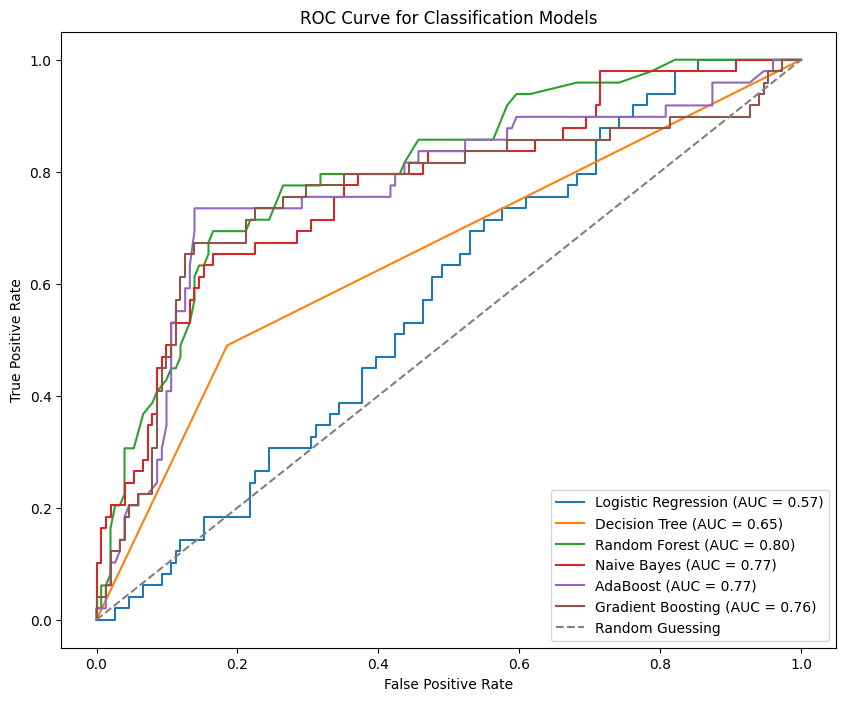

In [213]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


models = {
    'Logistic Regression': lg_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Naive Bayes': nb_model,
    'AdaBoost': adb_model,
    'Gradient Boosting': gb_model
}


plt.figure(figsize=(10, 8))
for name, model in models.items():

    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classification Models')
plt.legend(loc='lower right')
plt.show()
